In [2]:
import pandas as pd
import numpy as np

In [3]:
unames=['user_id','gender','age','occupation','zip']
rnames=['user_id','movie_id','rating','timestamp']
mnames=['movie_id','title','genre']

users = pd.read_csv("movielens/users.dat",names=unames, header=None, sep="::")
ratings = pd.read_csv("movielens/ratings.dat", names=rnames, header=None, sep="::")
movies = pd.read_csv("movielens/movies.dat", names=mnames, header=None, sep="::")

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  import sys


In [4]:
users.shape
ratings.shape
ratings
movies

# 연도 제목을 추출하는 정규분포식 작성 -> year, title컬럼
# 장르 -> 원핫인코딩
# 직업별 원핫인코딩으로 추천


,movie_id,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [5]:
# ratings과 users를 머지하려한다. -->  user_id가 동일하다
pd.merge(ratings,users)
data = pd.merge(pd.merge(ratings,users),movies)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
user_id       1000209 non-null int64
movie_id      1000209 non-null int64
rating        1000209 non-null int64
timestamp     1000209 non-null int64
gender        1000209 non-null object
age           1000209 non-null int64
occupation    1000209 non-null int64
zip           1000209 non-null object
title         1000209 non-null object
genre         1000209 non-null object
dtypes: int64(6), object(4)
memory usage: 83.9+ MB


In [6]:
#성별에 따른 각 영화의 평균 평점 출력
# data.groupby(['gender']).['rating']
# data.sort_values(by='gender',ascending=False)
mean_ratings = data.pivot_table('rating', index='title',columns='gender', aggfunc=np.mean)
mean_ratings
mean_ratings.shape #(3706, 2)
ratings_by_title = data.groupby('title').size() #Length: 3706  --> 동일한 영화에 대해 평점을 내린 사람의 수 
ratings_by_title[ratings_by_title >= 250]
active_titles = ratings_by_title.index[ratings_by_title >= 250] # 제목만 출력하고 싶을 때는, index를 사용
ratings_by_title.values[ratings_by_title >= 250] 

array([303, 700, 565, ..., 379, 301, 410], dtype=int64)

In [7]:
active_titles
mean_ratings.ix[active_titles]
mean_ratings.loc[active_titles]
mean_ratings = mean_ratings.loc[active_titles]

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [8]:
top_female_ratings = mean_ratings.sort_index(by='F',ascending=False)
top_female_ratings

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  """Entry point for launching an IPython kernel.


gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


In [9]:
mean_ratings['diff'] = mean_ratings['M']-mean_ratings['F'] # data간의 뺄셈이므로 수치가 나옴
mean_ratings
mean_ratings.sort_index(by='diff') # 차이 정도가 중요하다 --> 절댓값이 필요하다
mean_ratings['diff'] = np.abs(mean_ratings['M']-mean_ratings['F'])
sorted_by_diff = mean_ratings.sort_values(by='diff')

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
np.abs(-3)
np.abs(3)

3

In [11]:
sorted_by_diff[::] # 모두 출력
sorted_by_diff[::-1] # 역순으로 출력
sorted_by_diff[::-1][0:5] # 남녀간 평점 diff가 가장 큰 5편의 영화를 출력

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,0.830782
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Jumpin' Jack Flash (1986),3.254717,2.578358,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608


In [12]:
data.groupby('title')['rating'].std() # 동일한 영화에 대한 평점의 표준 편차 
# 표준편차가 크다 =분산이 크다 = 호불호가 크다

title
$1,000,000 Duck (1971)                            1.092563
'Night Mother (1986)                              1.118636
'Til There Was You (1997)                         1.020159
'burbs, The (1989)                                1.107760
...And Justice for All (1979)                     0.878110
1-900 (1994)                                      0.707107
10 Things I Hate About You (1999)                 0.989815
101 Dalmatians (1961)                             0.982103
101 Dalmatians (1996)                             1.098717
12 Angry Men (1957)                               0.812731
13th Warrior, The (1999)                          1.140421
187 (1997)                                        1.057919
2 Days in the Valley (1996)                       0.921592
20 Dates (1998)                                   1.151943
20,000 Leagues Under the Sea (1954)               0.869685
200 Cigarettes (1999)                             1.111964
2001: A Space Odyssey (1968)                      

### python 방식의 파일 불러오기

In [68]:
fr=open("bitly_usagov/example.txt")
fr.readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

### json 파일 불러오기

In [13]:
import json
records = [json.loads(line) for line in open("bitly_usagov/example.txt", encoding='utf-8')]
records

# records[0].['tz']

[{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
  'c': 'US',
  'nk': 1,
  'tz': 'America/New_York',
  'gr': 'MA',
  'g': 'A6qOVH',
  'h': 'wfLQtf',
  'l': 'orofrog',
  'al': 'en-US,en;q=0.8',
  'hh': '1.usa.gov',
  'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
  'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
  't': 1331923247,
  'hc': 1331822918,
  'cy': 'Danvers',
  'll': [42.576698, -70.954903]},
 {'a': 'GoogleMaps/RochesterNY',
  'c': 'US',
  'nk': 0,
  'tz': 'America/Denver',
  'gr': 'UT',
  'g': 'mwszkS',
  'h': 'mwszkS',
  'l': 'bitly',
  'hh': 'j.mp',
  'r': 'http://www.AwareMap.com/',
  'u': 'http://www.monroecounty.gov/etc/911/rss.php',
  't': 1331923249,
  'hc': 1308262393,
  'cy': 'Provo',
  'll': [40.218102, -111.613297]},
 {'a': 'Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 6.1; WOW64; Trident/4.0; SLCC2; .NET CLR 2.0.50727; .NET CLR 3.5.30729; .NET CLR 3.0.30729; Media Center PC 6.0

In [14]:
[rec['tz'] for rec in records] # tz 칼럼이 없는 데이터가 없으므로 에러가 난다

KeyError: 'tz'

In [16]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec] # 있으면 출력하라는 조건문을 안에 붙일 수 있다

In [22]:
len(time_zones)
time_zones

def get_counts(seq): ########### 많이 쓰는 구문이다. 딕셔너리를 이용해서 key가 몇개 있는지 확인하는 구문
    counts={}
    for s in seq:
        if s in counts:
           counts[s] += 1 # counts[s]는 키 s에 대한  value값을 리턴한다
        else:
           counts[s] = 1  # [s] 가 키 값이다. 
    return counts
    
counts = get_counts(time_zones) 

AttributeError: 'dict' object has no attribute 'sorted'

### python 방식의 코딩

In [32]:
# 상위 10개 도시 출력
counts  #.sorted()
# counts.sort_values(ascending=False)[:10]
# counts.

counts.items() # 키하고 밸류가 튜플 형태로 
counts.keys()
counts.values()

# vk = [(tz, count) for tz, count in counts.items()] # --> 키/밸류 순서
vk = [(count, tz) for tz, count in counts.items()] # --> 밸류/키 순서
print(vk.sort())
print(vk)


None
[(1, 'Africa/Casablanca'), (1, 'Africa/Johannesburg'), (1, 'Africa/Lusaka'), (1, 'America/Argentina/Buenos_Aires'), (1, 'America/Argentina/Cordoba'), (1, 'America/Argentina/Mendoza'), (1, 'America/Caracas'), (1, 'America/Costa_Rica'), (1, 'America/La_Paz'), (1, 'America/Lima'), (1, 'America/Mazatlan'), (1, 'America/Monterrey'), (1, 'America/Montevideo'), (1, 'America/Santo_Domingo'), (1, 'America/St_Kitts'), (1, 'America/Tegucigalpa'), (1, 'Asia/Kuching'), (1, 'Asia/Manila'), (1, 'Asia/Nicosia'), (1, 'Asia/Novosibirsk'), (1, 'Asia/Pontianak'), (1, 'Asia/Riyadh'), (1, 'Asia/Yekaterinburg'), (1, 'Australia/Queensland'), (1, 'Europe/Ljubljana'), (1, 'Europe/Skopje'), (1, 'Europe/Sofia'), (1, 'Europe/Uzhgorod'), (1, 'Europe/Volgograd'), (2, 'Africa/Ceuta'), (2, 'America/Chihuahua'), (2, 'America/Guayaquil'), (2, 'America/Recife'), (2, 'Asia/Amman'), (2, 'Europe/Belgrade'), (2, 'Europe/Malta'), (2, 'Europe/Riga'), (2, 'Europe/Vilnius'), (3, 'Africa/Cairo'), (3, 'America/Bogota'), (3, '

### library를 활용한 방법

In [33]:
from collections import Counter
counts = Counter(time_zones)
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

In [39]:
records
len(records)

3560

In [38]:
frame = pd.DataFrame(records)  # 3560개의 딕셔너리에서 key값이 열로 들어오고 
frame
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
_heartbeat_    120 non-null float64
a              3440 non-null object
al             3094 non-null object
c              2919 non-null object
cy             2919 non-null object
g              3440 non-null object
gr             2919 non-null object
h              3440 non-null object
hc             3440 non-null float64
hh             3440 non-null object
kw             93 non-null object
l              3440 non-null object
ll             2919 non-null object
nk             3440 non-null float64
r              3440 non-null object
t              3440 non-null float64
tz             3440 non-null object
u              3440 non-null object
dtypes: float64(4), object(14)
memory usage: 500.7+ KB


In [41]:
frame['tz'] # Nan 인 데이터와 아예 공백인 데이터가 있다 ' ' != NaN
            # NaN은 바구니 자체가 없음 ''은 바구니에 뭐가 안담긴 상태
frame['tz'].value_counts()

America/New_York                  1251
                                   521
America/Chicago                    400
America/Los_Angeles                382
America/Denver                     191
Europe/London                       74
Asia/Tokyo                          37
Pacific/Honolulu                    36
Europe/Madrid                       35
America/Sao_Paulo                   33
Europe/Berlin                       28
Europe/Rome                         27
America/Rainy_River                 25
Europe/Amsterdam                    22
America/Phoenix                     20
America/Indianapolis                20
Europe/Warsaw                       16
America/Mexico_City                 15
Europe/Stockholm                    14
Europe/Paris                        14
America/Vancouver                   12
Pacific/Auckland                    11
Europe/Helsinki                     10
Europe/Moscow                       10
Asia/Hong_Kong                      10
America/Puerto_Rico      

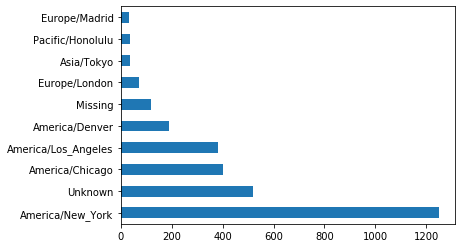

In [57]:
frame['tz'] == ''
frame[frame['tz'] == '']
# frame[frame['tz'] == ''].size
len(frame[frame['tz'] == '']) #521

# NaN은 문자열이 아니라 
len(frame[frame['tz'].isnull()])

frame['tz'].value_counts()
clean_tz =frame['tz'].fillna('Missing')
clean_tz.value_counts()

clean_tz[clean_tz==''] = 'Unknown'
clean_tz
tz_counts = clean_tz.value_counts()
tz_counts[:10]
tz_counts[:10].plot(kind='barh')

In [59]:
frame['a'] # frame.a 와 같은 말이다.
frame.a.isnull()  # boolean 타입으로 리턴

0       Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
1                                  GoogleMaps/RochesterNY
2       Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...
3       Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...
4       Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
5       Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
6       Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...
7       Mozilla/5.0 (Windows NT 6.1; rv:2.0.1) Gecko/2...
8       Opera/9.80 (X11; Linux zbov; U; en) Presto/2.1...
9       Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
10      Mozilla/5.0 (Windows NT 6.1; WOW64; rv:10.0.2)...
11      Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10.4...
12      Mozilla/5.0 (Windows NT 6.1; WOW64; rv:10.0.2)...
13                                                    NaN
14      Mozilla/5.0 (Windows; U; Windows NT 6.1; en-US...
15      Mozilla/5.0 (Windows NT 6.1) AppleWebKit/535.1...
16      Mozilla/5.0 (Windows NT 6.1) AppleWebKit/535.1...
17      Mozill

In [65]:
len(frame[frame.a.isnull()])
len(frame) #3560
frame.info() # 3440(NaN 120)

frame.a.dropna() # fillna가 채우는 거라면 dropna는 na를 지우는 것

# [x.split() for x in frame.a.dropna()]
results = pd.Series([x.split()[0] for x in frame.a.dropna()])
results

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
_heartbeat_    120 non-null float64
a              3440 non-null object
al             3094 non-null object
c              2919 non-null object
cy             2919 non-null object
g              3440 non-null object
gr             2919 non-null object
h              3440 non-null object
hc             3440 non-null float64
hh             3440 non-null object
kw             93 non-null object
l              3440 non-null object
ll             2919 non-null object
nk             3440 non-null float64
r              3440 non-null object
t              3440 non-null float64
tz             3440 non-null object
u              3440 non-null object
dtypes: float64(4), object(14)
memory usage: 500.7+ KB


0                  Mozilla/5.0
1       GoogleMaps/RochesterNY
2                  Mozilla/4.0
3                  Mozilla/5.0
4                  Mozilla/5.0
5                  Mozilla/5.0
6                  Mozilla/5.0
7                  Mozilla/5.0
8                   Opera/9.80
9                  Mozilla/5.0
10                 Mozilla/5.0
11                 Mozilla/5.0
12                 Mozilla/5.0
13                 Mozilla/5.0
14                 Mozilla/5.0
15                 Mozilla/5.0
16                 Mozilla/5.0
17      GoogleMaps/RochesterNY
18                 Mozilla/5.0
19                 Mozilla/5.0
20                 Mozilla/5.0
21                 Mozilla/4.0
22                 Mozilla/5.0
23                 Mozilla/5.0
24                 Mozilla/5.0
25                 Mozilla/5.0
26                 Mozilla/5.0
27                 Mozilla/5.0
28                 Mozilla/5.0
29                 Mozilla/5.0
                 ...          
3410               Mozilla/5.0
3411    

In [68]:
results.value_counts() # 내부적으로 밸류에 대한 내림차순으로 출력
results.value_counts()[:5]

Mozilla/5.0               2594
Mozilla/4.0                601
GoogleMaps/RochesterNY     121
Opera/9.80                  34
TEST_INTERNET_AGENT         24
dtype: int64

In [70]:
cframe = frame[frame.a.notnull()]
cframe

,_heartbeat_,a,al,c,cy,g,gr,h,hc,hh,kw,l,ll,nk,r,t,tz,u
0,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1.331823e+09,1.usa.gov,NaN,orofrog,"[42.576698, -70.954903]",1.0,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1.331923e+09,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
1,NaN,GoogleMaps/RochesterNY,NaN,US,Provo,mwszkS,UT,mwszkS,1.308262e+09,j.mp,NaN,bitly,"[40.218102, -111.613297]",0.0,http://www.AwareMap.com/,1.331923e+09,America/Denver,http://www.monroecounty.gov/etc/911/rss.php
2,NaN,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,en-US,US,Washington,xxr3Qb,DC,xxr3Qb,1.331920e+09,1.usa.gov,NaN,bitly,"[38.9007, -77.043098]",1.0,http://t.co/03elZC4Q,1.331923e+09,America/New_York,http://boxer.senate.gov/en/press/releases/0316...
3,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,pt-br,BR,Braz,zCaLwp,27,zUtuOu,1.331923e+09,1.usa.gov,NaN,alelex88,"[-23.549999, -46.616699]",0.0,direct,1.331923e+09,America/Sao_Paulo,http://apod.nasa.gov/apod/ap120312.html
4,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,9b6kNl,MA,9b6kNl,1.273672e+09,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0.0,http://www.shrewsbury-ma.gov/selco/,1.331923e+09,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...
5,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,axNK8c,MA,axNK8c,1.273673e+09,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0.0,http://www.shrewsbury-ma.gov/selco/,1.331923e+09,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...
6,NaN,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,"pl-PL,pl;q=0.8,en-US;q=0.6,en;q=0.4",PL,Luban,wcndER,77,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,"[51.116699, 15.2833]",0.0,http://plus.url.google.com/url?sa=z&n=13319232...,1.331923e+09,Europe/Warsaw,http://www.nasa.gov/mission_pages/nustar/main/...
7,NaN,Mozilla/5.0 (Windows NT 6.1; rv:2.0.1) Gecko/2...,"bg,en-us;q=0.7,en;q=0.3",None,NaN,wcndER,NaN,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,NaN,0.0,http://www.facebook.com/,1.331923e+09,,http://www.nasa.gov/mission_pages/nustar/main/...
8,NaN,Opera/9.80 (X11; Linux zbov; U; en) Presto/2.1...,"en-US, en",None,NaN,wcndER,NaN,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,NaN,0.0,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,1.331923e+09,,http://www.nasa.gov/mission_pages/nustar/main/...
9,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"pt-BR,pt;q=0.8,en-US;q=0.6,en;q=0.4",None,NaN,zCaLwp,NaN,zUtuOu,1.331923e+09,1.usa.gov,NaN,alelex88,NaN,0.0,http://t.co/o1Pd0WeV,1.331923e+09,,http://apod.nasa.gov/apod/ap120312.html


In [71]:
cframe.a

0       Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
1                                  GoogleMaps/RochesterNY
2       Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...
3       Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...
4       Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
5       Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
6       Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...
7       Mozilla/5.0 (Windows NT 6.1; rv:2.0.1) Gecko/2...
8       Opera/9.80 (X11; Linux zbov; U; en) Presto/2.1...
9       Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
10      Mozilla/5.0 (Windows NT 6.1; WOW64; rv:10.0.2)...
11      Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10.4...
12      Mozilla/5.0 (Windows NT 6.1; WOW64; rv:10.0.2)...
14      Mozilla/5.0 (Windows; U; Windows NT 6.1; en-US...
15      Mozilla/5.0 (Windows NT 6.1) AppleWebKit/535.1...
16      Mozilla/5.0 (Windows NT 6.1) AppleWebKit/535.1...
17      Mozilla/5.0 (Macintosh; Intel Mac OS X 10.5; r...
18            

In [76]:
cframe.a #문자열에서 특정 문자가 있/없다를 확인하는 contains()
cframe.a.str.contains("Windows")
os = np.where(cframe.a.str.contains("Windows"),"Windows","Not Windows")

In [78]:
by_tz_os = cframe.groupby(['tz',os])
by_tz_os
by_tz_os.size()

tz                                         
                                Not Windows    245
                                Windows        276
Africa/Cairo                    Windows          3
Africa/Casablanca               Windows          1
Africa/Ceuta                    Windows          2
Africa/Johannesburg             Windows          1
Africa/Lusaka                   Windows          1
America/Anchorage               Not Windows      4
                                Windows          1
America/Argentina/Buenos_Aires  Not Windows      1
America/Argentina/Cordoba       Windows          1
America/Argentina/Mendoza       Windows          1
America/Bogota                  Not Windows      1
                                Windows          2
America/Caracas                 Windows          1
America/Chicago                 Not Windows    115
                                Windows        285
America/Chihuahua               Not Windows      1
                                Window